In [1]:
# Callback duration
#
# Get trace data using the provided launch file:
#    $ ros2 launch tracetools_analysis pingpong.launch.py
#    (wait a few seconds, then kill with Ctrl+C)
#
# (optional) convert trace data:
#    $ ros2 run tracetools_analysis convert ~/.ros/tracing/pingpong/ust
#
# OR
#
# Use the provided sample converted trace file, changing the path below to:
#    'sample_data/converted_pingpong'

In [2]:
#path = '~/pnn16004/ros2_ws/tracing/ping_trace/ust'
#path = '~/pnn16004/ros2_ws/tracing/ros2_100/due-f7-100-2/test_ping_trace/ust'
#path = '~/pnn16004/ros2_ws/tracing/ros2_80/due-f7-80-2/test_ping_trace/ust'
#path = '~/pnn16004/ros2_ws/tracing/ros2_60/due-f7-60-2/test_ping_trace/ust'
path = '~/pnn16004/ros2_ws/tracing/ros2_3/f7-32s-80-3/test_ping_trace/ust'

In [3]:
import math
import sys
# Assuming a workspace with:
#   src/tracetools_analysis/
#   src/ros-tracing/ros2_tracing/tracetools_read/
sys.path.insert(0, '../')
sys.path.insert(0, '../../../ros-tracing/ros2_tracing/tracetools_read/')
import datetime as dt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tracetools_analysis.loading import load_file
from tracetools_analysis.processor.ros2 import Ros2Handler
from tracetools_analysis.utils.ros2 import Ros2DataModelUtil

In [4]:
# Process
events = load_file(path)
handler = Ros2Handler.process(events)
#handler.data.print_data()

found converted file: /home/user/pnn16004/ros2_ws/tracing/ros2_3/f7-32s-80-3/test_ping_trace/ust/converted
 [100%] [Ros2Handler]


In [5]:
data_util = Ros2DataModelUtil(handler.data)

callback_symbols = data_util.get_callback_symbols()

psize = 450
colours = ['#FF5733', '#ECFF33', '#DD4968', '#29788E', '#410967', '#DD4968']
# Ping: '#29788E', Pong: '#DD4968', Peng: '#410967',

[ True  True  True ...  True  True  True]


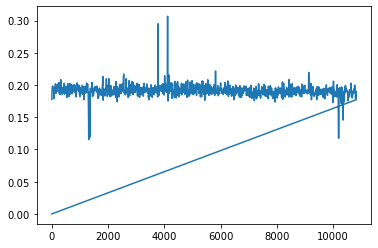

In [6]:
# Plot durations separately
colour_i = 0
avg = [0, 0]
for obj, symbol in callback_symbols.items():
    owner_info = data_util.get_callback_owner_info(obj)
    if owner_info is None:
        owner_info = '[unknown]'
        
    # Filter out internal subscriptions
    if '/parameter_events' in owner_info:
        continue
    
    if not "/mros/ping" in owner_info and not "/mros/pong" in owner_info and not "/mros/peng" in owner_info:
        continue
    
    if "/mros/ping" in owner_info:
        color = '#29788E'
        name = 'Ping'
    elif "/mros/pong" in owner_info:
        color = '#DD4968'
        name = 'Pong'
    elif "/mros/peng" in owner_info:
        color = '#410967'
        name = 'Peng'

    # Duration
    duration_df = data_util.get_callback_durations(obj)
    duration_ms = duration_df['duration'] * 1000 / np.timedelta64(1, 's') # List of durations in ms
    #starttime = duration_df.loc[:, 'timestamp'].iloc[0].strftime('%Y-%m-%d %H:%M')
    
    #plt.bar(*zip(*duration_df.items()))
    #plt.show()
    #print(*zip(*duration_df.items()))
    
    source = pd.DataFrame(duration_df)
    
    timestamp = source['timestamp'].apply(lambda x: x.value)
    duration = source['duration'].apply(lambda x: x.value)
    
    time = np.array(timestamp.values)
    data = np.array(duration.values)
    
    time = (time - time[0]) / pow(10, 9)
    data = data / pow(10, 6)
    
    length = len(time)
    timeAvg = np.zeros(length)
    dataAvg = np.zeros(length)
    
    avg = 70
    iMax = math.floor(length / avg)
    for i in range(0, iMax):
        step = i * avg
        timeAvg[i] = time[step]
        dataAvg[i] = sum(data[step:step+avg]) / avg
        
        #plt.plot(timeAvg, dataAvg)
        #print(timeAvg[i])
        #print(dataAvg[1])
    
    plt.plot(timeAvg, dataAvg)
    print(time==sorted(time))
    break

plt.show()